# Linear Model For Regression Analysis

## Import Module

In [20]:
# Import some useful module
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import sqrt
%pylab inline

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('precision', 4)

Populating the interactive namespace from numpy and matplotlib


/opt/conda/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['sqrt']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [21]:
# Import dataset and linear model
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error

## Import dataset

In [22]:
df = pd.read_csv('train_one_hot.csv')
df.head(2)

,Unnamed: 0,Id,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,FireplaceQu,GarageYrBlt,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscVal,MoSold,Building_age,Remod_age,GarageYrBlt_age,LandSlope_class,LandContour_class,Utilities_class,ConditionSum,GarageFinish_class,SeasonSold,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_150,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,Alley_NA,Alley_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,Utilities_NoSeWa,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,BsmtFullBath_0.0,BsmtFullBath_1.0,BsmtFullBath_2.0,BsmtFullBath_3.0,BsmtHalfBath_0.0,BsmtHalfBath_1.0,BsmtHalfBath_2.0,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,Fireplaces_0,Fireplaces_1,Fireplaces_2,Fireplaces_3,Fireplaces_4,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,GarageFinish_Fin,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf,GarageCars_0.0,GarageCars_1.0,GarageCars_2.0,GarageCars_3.0,Garag

In [23]:
#Check whether have null data
null_check = df.isnull().sum()
null_check[null_check>0]

Series([], dtype: int64)

## Model Predictors And Responce

In [24]:
#Seperate the feature and the target
df, df_R = df, df.pop('SalePrice')

In [25]:
#Pop unnecessary columns
df.pop('Id');
df.pop('Unnamed: 0');

In [26]:
df.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,FireplaceQu,GarageYrBlt,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscVal,MoSold,Building_age,Remod_age,GarageYrBlt_age,LandSlope_class,LandContour_class,Utilities_class,ConditionSum,GarageFinish_class,SeasonSold,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_150,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,Alley_NA,Alley_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,Utilities_NoSeWa,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,BsmtFullBath_0.0,BsmtFullBath_1.0,BsmtFullBath_2.0,BsmtFullBath_3.0,BsmtHalfBath_0.0,BsmtHalfBath_1.0,BsmtHalfBath_2.0,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,Fireplaces_0,Fireplaces_1,Fireplaces_2,Fireplaces_3,Fireplaces_4,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,GarageFinish_Fin,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf,GarageCars_0.0,GarageCars_1.0,GarageCars_2.0,GarageCars_3.0,GarageCars_4.0,Gara

## Cross-validation
### Seperate the training/ validation/ testing set

In [27]:
from sklearn.cross_validation import train_test_split

In [28]:
#Seperate the training/ validation/ testing set
x_train, x_test, y_train, y_test = train_test_split(df,df_R,random_state = 42, test_size=0.2)
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, random_state=42, test_size=0.2)

## Training the different model and compute MSE

### Here is making the prediction baseline

In [29]:
#Least Square Regression
lr = linear_model.LinearRegression()
lr.fit(x_train, y_train)
predict_lr = lr.predict(x_valid)
print('Linear Regression Model:')
print('\t RMSE = {:.4f}'.format(sqrt(mean_squared_error(y_valid, predict_lr))))
print('\t Training Score: {:.4f}'.format(lr.score(x_train, y_train),4))
print('\t Validation Score: {:.4f}'.format(lr.score(x_valid, y_valid),4))

#Ridge Regression
rg = linear_model.Ridge()
rg.fit(x_train, y_train)
predict_rg = rg.predict(x_valid)
print('Ridge Regression Model:')
print('\t MSE = {:.4f}'.format(sqrt(mean_squared_error(y_valid, predict_rg))))
print('\t Training Score: {:.4f}'.format(rg.score(x_train, y_train),4))
print('\t Validation Score: {:.4f}'.format(rg.score(x_valid, y_valid),4))

#Lasso Regression
ls = linear_model.Lasso()
ls.fit(x_train, y_train)
predict_ls = ls.predict(x_valid)
print('Lasso Regression Model:')
print('\t MSE = {:.4f}'.format(sqrt(mean_squared_error(y_valid, predict_ls))))
print('\t Training Score: {:.4f}'.format(ls.score(x_train, y_train),4))
print('\t Validation Score: {:.4f}'.format(ls.score(x_valid, y_valid),4))

#ElasticNet Regression
en = linear_model.ElasticNet()
en.fit(x_train, y_train)
predict_en = en.predict(x_valid)
print('ElasticNet Regression Model:')
print('\t MSE = {:.4f}'.format(sqrt(mean_squared_error(y_valid, predict_en))))
print('\t Training Score: {:.4f}'.format(en.score(x_train, y_train),4))
print('\t Validation Score: {:.4f}'.format(en.score(x_valid, y_valid),4))

Linear Regression Model:
	 RMSE = 0.1411
	 Training Score: 0.9545
	 Validation Score: 0.8793
Ridge Regression Model:
	 MSE = 0.1376
	 Training Score: 0.9481
	 Validation Score: 0.8851
Lasso Regression Model:
	 MSE = 0.2915
	 Training Score: 0.4481
	 Validation Score: 0.4847
ElasticNet Regression Model:
	 MSE = 0.2849
	 Training Score: 0.4599
	 Validation Score: 0.5077


## Tunning Ridge

In [30]:
#Prepare CV dataset
cv_x_data = pd.concat([x_train, x_valid])
cv_y_data = pd.concat([y_train, y_valid])

In [31]:
from sklearn.model_selection import GridSearchCV

In [27]:
param_grid_R = {'alpha':[0.001,0.01,0.1,1,10,100]}
grid_search_R = GridSearchCV(linear_model.Ridge(), param_grid_R, cv=5)

In [28]:
grid_search_R.fit(cv_x_data, cv_y_data)
print('Best parameter of Ridge is:', grid_search_R.best_params_)
print('Best score of cv is: {:.4f}'.format(grid_search_R.best_score_))

Best parameter of Ridge is: {'alpha': 10}
Best score of cv is: 0.8885


In [162]:
rg2 = linear_model.Ridge(alpha=10)
rg2.fit(cv_x_data, cv_y_data)
predictR2 = rg2.predict(x_test)

print('Ridge Regression Model:')
print('MSE =', sqrt(mean_squared_error(y_test, predictR2)))
print('Training Score: {:.4f}'.format(rg2.score(cv_x_data, cv_y_data)))
print('Testing Score: {:.4f}'.format(rg2.score(x_test, y_test)))

Ridge Regression Model:
MSE = 30208.845993669514
Training Score: 0.9133
Testing Score: 0.8810


## Tunning Lasso regression

In [29]:
param_grid_L = {'alpha':[0.001,0.01,0.1,1,10,100]}
grid_search_L = GridSearchCV(linear_model.Lasso(),param_grid_L,cv=5)
grid_search_L.fit(cv_x_data, cv_y_data)
print('Best parameter of Lasso is:', grid_search_L.best_params_)
print('Best score of cv is:', grid_search_L.best_score_)

Best parameter of Lasso is: {'alpha': 0.001}
Best score of cv is: 0.8964368899334391


In [164]:
ls2 = linear_model.Lasso(alpha=0.001)
ls2.fit(cv_x_data, cv_y_data)
predictL3 = ls2.predict(x_test)

print('Lasso Regression Model:\n')
print('MSE =', sqrt(mean_squared_error(y_test, predictL3)))
print('Training Score: {:.4f}'.format(ls2.score(cv_x_data, cv_y_data)))
print('Testing Score: {:.4f}'.format(ls2.score(x_test, y_test)))

Lasso Regression Model:

MSE = 28259.794630809225
Training Score: 0.9313
Testing Score: 0.8959


## Tunning ElasticNet

In [30]:
param_grid_E = {'alpha':[0.001,0.01,0.1,1,10,100],
               'l1_ratio':[x/100 for x in range(1,100,100)]}

grid_search_E = GridSearchCV(linear_model.ElasticNet(),param_grid_E,cv=5)
grid_search_E.fit(cv_x_data, cv_y_data)
print('Best parameter of ElasticNet is:', grid_search_E.best_params_)
print('Best score of cv is:', grid_search_E.best_score_)

Best parameter of ElasticNet is: {'alpha': 0.01, 'l1_ratio': 0.01}
Best score of cv is: 0.8901743165096114


In [166]:
en2 = linear_model.ElasticNet(alpha=0.01,l1_ratio=0.01)
en2.fit(cv_x_data, cv_y_data)
predictE4 = en2.predict(x_test)

print('ElasticNet Regression Model:\n')
print('MSE =', sqrt(mean_squared_error(y_test, predictE4)))
print('Training Score: {:.4f}'.format(en2.score(cv_x_data, cv_y_data)))
print('Testing Score: {:.4f}'.format(en2.score(x_test, y_test)))

ElasticNet Regression Model:

MSE = 30258.57469548858
Training Score: 0.9102
Testing Score: 0.8806


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


## Forward Stepwise Strategy
### Here is use for examination the all numerical columns contribute to the response or not

In [49]:
#Select the numerical columns
numerical_col = ['LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearRemodAdd', 'MasVnrArea', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
    'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold']
df_FSS = cv_x_data[numerical_col]

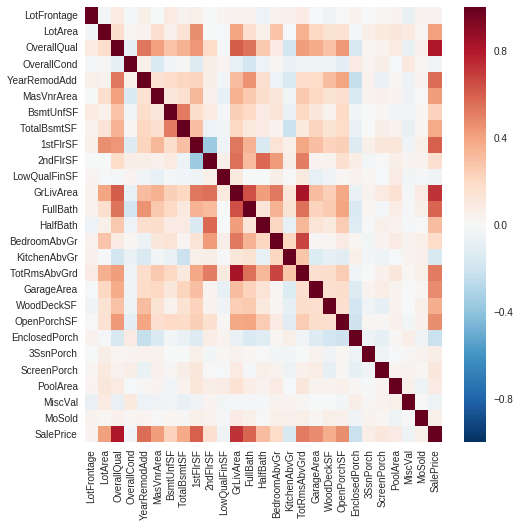

In [43]:
# Use heatmap to view the correlation
df_all = pd.concat([df_FSS,cv_y_data],axis=1)
plt.figure(figsize=(8,8))
sns.heatmap(df_all.corr())

In [44]:
# Sort the correlation to add the preditor one by one.
df_all_corr = df_all.corr()
corr = abs(df_all_corr['SalePrice']).sort_values(ascending=False)
corr = corr.drop('SalePrice')
corr

OverallQual      0.8079
GrLivArea        0.7236
1stFlrSF         0.5952
FullBath         0.5837
YearRemodAdd     0.5622
TotRmsAbvGrd     0.5201
GarageArea       0.4691
OpenPorchSF      0.4612
MasVnrArea       0.4200
LotArea          0.4113
TotalBsmtSF      0.3797
WoodDeckSF       0.3627
HalfBath         0.3123
BsmtUnfSF        0.2298
EnclosedPorch    0.2260
BedroomAbvGr     0.1933
2ndFlrSF         0.1714
KitchenAbvGr     0.1576
ScreenPorch      0.1074
PoolArea         0.0844
3SsnPorch        0.0648
MoSold           0.0557
MiscVal          0.0487
LowQualFinSF     0.0408
OverallCond      0.0344
LotFrontage      0.0309
Name: SalePrice, dtype: float64

In [50]:
# Use the forward stepwise strategy to run the linear square regression.
forward_predictor = pd.DataFrame()
forward_test = pd.DataFrame()
PredictorNum = []
MSE = []
training_score = []
valid_score = []

for i in range(len(corr)):
    mse_value = 0
    forward_predictor[corr.index[i]] = df_FSS[corr.index[i]]
    forward_test[corr.index[i]] = x_test[corr.index[i]]
    
    #assign model here
    model = linear_model.LinearRegression()
    model.fit(forward_predictor,cv_y_data)
    PredictorNum.append(len(forward_predictor.columns))
    mse_value = mean_squared_error(cv_y_data,model.predict(forward_predictor))
    MSE.append(sqrt(mse_value))
    training_score.append(model.score(forward_predictor,cv_y_data))
    valid_score.append(model.score(forward_test,y_test))
    print('Feature number: {}, MSE = {:.4f}'.format(i+1,mse_value))
    
mse = pd.DataFrame({'PredictorNum':PredictorNum,'MSE':MSE,
                    'Train_Score':training_score,'Test_Score':valid_score})

Feature number: 1, MSE = 0.0529
Feature number: 2, MSE = 0.0396
Feature number: 3, MSE = 0.0354
Feature number: 4, MSE = 0.0350
Feature number: 5, MSE = 0.0314
Feature number: 6, MSE = 0.0313
Feature number: 7, MSE = 0.0288
Feature number: 8, MSE = 0.0286
Feature number: 9, MSE = 0.0283
Feature number: 10, MSE = 0.0259
Feature number: 11, MSE = 0.0254
Feature number: 12, MSE = 0.0251
Feature number: 13, MSE = 0.0245
Feature number: 14, MSE = 0.0239
Feature number: 15, MSE = 0.0237
Feature number: 16, MSE = 0.0237
Feature number: 17, MSE = 0.0235
Feature number: 18, MSE = 0.0230
Feature number: 19, MSE = 0.0228
Feature number: 20, MSE = 0.0226
Feature number: 21, MSE = 0.0226
Feature number: 22, MSE = 0.0226
Feature number: 23, MSE = 0.0226
Feature number: 24, MSE = 0.0224
Feature number: 25, MSE = 0.0219
Feature number: 26, MSE = 0.0219


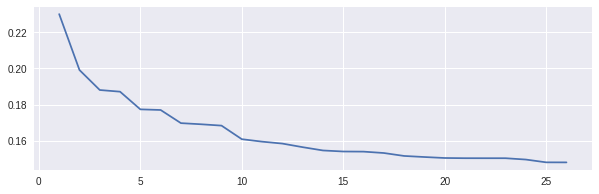

In [46]:
# View the MSE of each quantities of predictors.
plt.figure(figsize=(10,3))
plt.plot(mse['PredictorNum'],mse['MSE'])

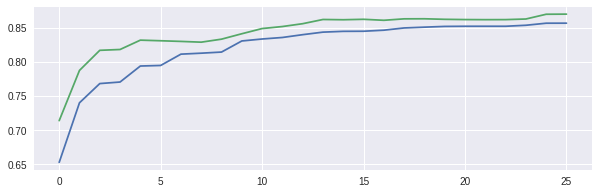

In [47]:
#Compare the training score and testing score
plt.figure(figsize=(10,3))
plt.plot(mse['Train_Score'])
plt.plot(mse['Test_Score'])

In [52]:
mse['Test_Score'].max()

MSE              0.2301
PredictorNum    26.0000
Test_Score       0.8696
Train_Score      0.8564
dtype: float64